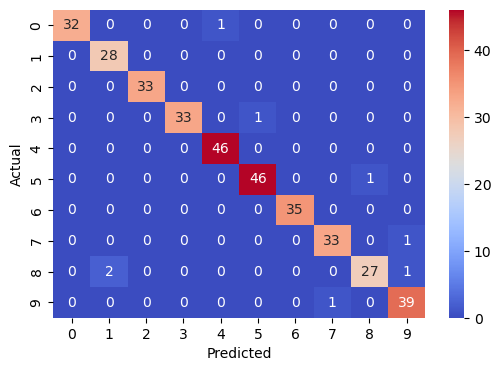

In [2]:
#Name: Taslim Ansari
#UIN: 221P010
#Roll NO: 03
#experiment 6: bagging all main

import tkinter as tk
from tkinter import messagebox
import pandas as pd
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sn
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

def train_model():
    try:
        digits = load_digits()
        X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=42)
        model = RandomForestClassifier(n_estimators=int(n_estimators_entry.get()))
        model.fit(X_train, y_train)
        accuracy = model.score(X_test, y_test)
        accuracy_lbl.config(text=f"Accuracy: {accuracy:.2f}")
        cm = confusion_matrix(y_test, model.predict(X_test))
        fig, ax = plt.subplots(figsize=(6, 4))
        sn.heatmap(cm, annot=True, fmt="d", cmap="coolwarm", ax=ax)
        plt.xlabel("Predicted"), plt.ylabel("Actual")
        for widget in canvas_frame.winfo_children():
            widget.destroy()
        canvas = FigureCanvasTkAgg(fig, master=canvas_frame)
        canvas.draw()
        canvas.get_tk_widget().pack()
    except Exception as e:
        messagebox.showerror("Error", str(e))

app = tk.Tk()
app.title("Random Forest Classifier - Taslim Ansari 221P010")
app.config(bg="#f0f0f0")

tk.Label(app, text="Number of Estimators:", bg="#f0f0f0").pack(pady=10)
n_estimators_entry = tk.Entry(app)
n_estimators_entry.insert(0, "20")
n_estimators_entry.pack(pady=5)

train_btn = tk.Button(app, text="Train Model", command=train_model, bg="#4CAF50", fg="white")
train_btn.pack(pady=15)

accuracy_lbl = tk.Label(app, text="Accuracy: N/A", bg="#f0f0f0")
accuracy_lbl.pack(pady=10)

canvas_frame = tk.Frame(app, bg="#f0f0f0")
canvas_frame.pack(pady=15)

app.mainloop()


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

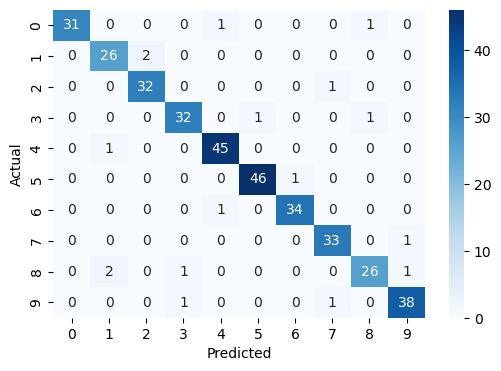

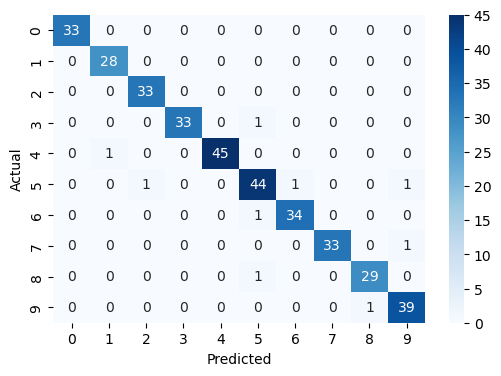

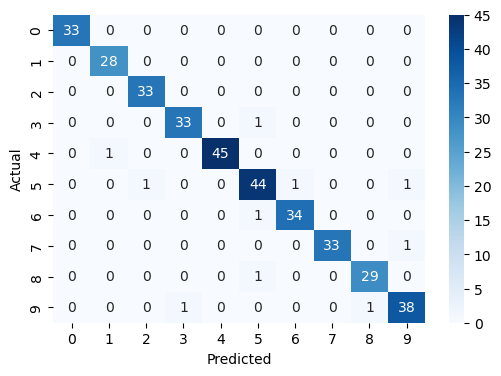

In [3]:
import tkinter as tk
from tkinter import messagebox, ttk
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import seaborn as sn
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg


def train_model():
    try:
        digits = load_digits()
        X, y = digits.data, digits.target
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Use 'estimator' instead of 'base_estimator'
        estimator = DecisionTreeClassifier() if estimator_combo.get() == "Decision Tree" else LogisticRegression(max_iter=1000)
        model = BaggingClassifier(estimator=estimator, n_estimators=int(estimator_entry.get()))
        model.fit(X_train, y_train)

        accuracy = model.score(X_test, y_test)
        accuracy_label.config(text=f"Model Accuracy: {accuracy:.2f}")

        cm = confusion_matrix(y_test, model.predict(X_test))
        fig, ax = plt.subplots(figsize=(6, 4))
        sn.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=ax)
        ax.set_xlabel("Predicted"), ax.set_ylabel("Actual")

        for widget in canvas_frame.winfo_children():
            widget.destroy()
        canvas = FigureCanvasTkAgg(fig, master=canvas_frame)
        canvas.draw()
        canvas.get_tk_widget().pack()
    except Exception as e:
        messagebox.showerror("Error", str(e))


window = tk.Tk()
window.title("Bagging Classifier GUI - Taslim Ansari 221P010")
window.config(bg="#f0f0f0")

ttk.Label(window, text="Select Base Estimator:").pack(pady=10)
estimator_combo = ttk.Combobox(window, values=["Decision Tree", "Logistic Regression"], state="readonly")
estimator_combo.current(0)
estimator_combo.pack(pady=10)

ttk.Label(window, text="Number of Estimators:").pack(pady=10)
estimator_entry = tk.Entry(window)
estimator_entry.insert(0, "10")
estimator_entry.pack(pady=10)

tk.Button(window, text="Train Model", command=train_model, bg="#4CAF50", fg="white").pack(pady=20)
accuracy_label = tk.Label(window, text="Model Accuracy: N/A")
accuracy_label.pack(pady=10)

canvas_frame = tk.Frame(window, bg="#f0f0f0")
canvas_frame.pack(pady=20)

window.mainloop()


In [4]:
import tkinter as tk
from tkinter import ttk, messagebox
from sklearn.datasets import make_regression
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error

def create_gui():
    def train_model():
        try:
            X, y = make_regression(n_samples=1000, n_features=10, noise=0.1)
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

            model = DecisionTreeRegressor(random_state=42) if model_choice.get() == "Decision Tree" else LinearRegression()
            bag_model = BaggingRegressor(n_estimators=int(n_estimators.get()), max_samples=float(samples.get()),
                                         bootstrap=bool(bootstrap_var.get()), random_state=42)

            param_grid = {'n_estimators': [50, 100, 200], 'max_samples': [0.5, 0.7, 1.0], 'bootstrap': [True, False]}
            grid = GridSearchCV(bag_model, param_grid, cv=5)
            grid.fit(X_train, y_train)

            y_pred = grid.best_estimator_.predict(X_test)
            mse = mean_squared_error(y_test, y_pred)
            r2_train, r2_test = grid.best_estimator_.score(X_train, y_train), grid.best_estimator_.score(X_test, y_test)

            result_label.config(text=f"MSE: {mse:.4f}, Train R²: {r2_train:.3f}, Test R²: {r2_test:.3f}")
            best_params_label.config(text=f"Best Params: {grid.best_params_}")
        except Exception as e:
            messagebox.showerror("Error", str(e))

    window = tk.Tk()
    window.title("Bagging Regressor - Taslim Ansari 221P010")

    ttk.Label(window, text="Model:").pack(pady=5)
    model_choice = ttk.Combobox(window, values=["Decision Tree", "Linear Regressor"], state="readonly")
    model_choice.current(0)
    model_choice.pack(pady=5)

    for text, var in [("Estimators:", "100"), ("Samples (0-1):", "0.5")]:
        ttk.Label(window, text=text).pack(pady=5)
        entry = tk.Entry(window)
        entry.insert(0, var)
        entry.pack(pady=5)
        if text.startswith("Estimators"):
            n_estimators = entry
        else:
            samples = entry

    bootstrap_var = tk.IntVar()
    tk.Checkbutton(window, text="Bootstrap", variable=bootstrap_var).pack(pady=5)

    tk.Button(window, text="Train Model", command=train_model).pack(pady=10)

    result_label = tk.Label(window, text="MSE: N/A")
    result_label.pack(pady=5)
    best_params_label = tk.Label(window, text="Best Params: N/A")
    best_params_label.pack(pady=5)

    window.mainloop()

create_gui()
